# Introduction to NLP fundamentals in Tensorflow


NLP - deriving information out of natural language


In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-44ced4e4-27a9-e8fa-9bff-35b61f4d74d6)


## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/krishnamenon215/Tensorflow/main/helper_functions.py

--2023-01-24 02:46:25--  https://raw.githubusercontent.com/krishnamenon215/Tensorflow/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-24 02:46:25 (89.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
#Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

## Get text dataset

dataset used: Kaggles introduction to NLP dataset(text samples of tweets labelled as disaster or not)

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-01-24 02:46:34--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 108.177.127.128, 2a00:1450:4013:c16::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2023-01-24 02:46:34 (86.9 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
#unzip data
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [8]:
# shuffle training dataframe
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
#visualise test_data
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
#examples of each class
train_df_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
#How many total samples
len(train_df), len(test_df)

(7613, 3263)

In [12]:
# Lets visualise soem random training examples
import random
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"Target:{target}","(real disaster)" if target > 0 else "(not real disaster")
  print(f"Text:{text}")
  print("\n")


Target:0 (not real disaster
Text:WRAPUP 2-U.S. cable TV companies' shares crushed after Disney disappoints http://t.co/jFJLbF40To


Target:0 (not real disaster
Text:What the fuck was that. There was a loud bang and a flash of light outside. I'm pretty sure I'm not dead but what the hell??


Target:1 (real disaster)
Text:'Three #people were #killed when a severe #rainstorm in the #Italian #Alps caused a #landslide' http://t.co/hAXJ6Go2ac


Target:1 (real disaster)
Text:RÌ©union Debris Is Almost Surely From Flight 370 Officials Say - New York Times http://t.co/VFbW3NyO9L


Target:1 (real disaster)
Text:The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/hCKxJ8eukt




### Split data into training and validation sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#split training data into training and validation test
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [15]:
# check the lengths 
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [16]:
#Check first 10 examples
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Convert text into numbers

ways to convert text to numbers:
1. Tokenization
2. Embedding


### Text vectorization

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [18]:
#Use the default textvectorization parameters
text_vectorizer = TextVectorization(max_tokens=None,#how many words in vocabulary(automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams=None,#create groups of n words
                                    output_mode ="int",#how to map tokens to numbers
                                    output_sequence_length=None)#,#how long do you want the sequences to be
                                    #pad_to_max_tokens=True)



In [19]:
#Find the average number of tokens in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
#setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 #max length our sequence will be

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode ="int",
                                    output_sequence_length = max_length)

In [21]:
#Fit the text vectorizer to training sentence
text_vectorizer.adapt(train_sentences)

In [22]:
#createa a sample sentence and tokenize it
sample_sentence = "There's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# Choose random sentence from training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text :\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text :
 I learned more about economics from one South Dakota dust storm than I did in all my years in college.  -Hubert Humphrey        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   8, 5235,   51,   54,    1,   20,   61,  593,    1,  398,   84,
          76,    8,  145,    4]])>

In [24]:
# get the unique word in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() #get all the unique words in the vocabulary of training sentence
top_5_words = words_in_vocab[:5] #get most common word
bottom_5_words = words_in_vocab[-5:] #get least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an embedding layer


for embedding we are gona use tensorflow embedding layer
parameters used:
1. input_dim - size of vocabulary
2. output_dim - size of the output embedding vector
3. input_length -length of sequences being passed to the embedding layer

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length = max_length)
embedding

In [26]:
#get a random sentence from the training sentences
random_sentence = random.choice(train_sentences)
print(f"Original Text:\n {random_sentence}\
        \n\n Embedded version:")

#embed the random sentence
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text:
 Fairfax investigating firefighter over Facebook post saying police should be put in Û÷body bagsÛª - The Washington Post http://t.co/jAxHzjCCd4        

 Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02529866,  0.01702963,  0.01157248, ...,  0.02742871,
          0.02575172,  0.03873155],
        [ 0.04790511,  0.0103073 ,  0.0488452 , ..., -0.03295219,
         -0.03191902, -0.01645637],
        [-0.0400126 ,  0.01025146,  0.01038294, ...,  0.00519135,
         -0.04551404,  0.01203651],
        ...,
        [-0.01714204,  0.00822354, -0.01218826, ...,  0.02357947,
          0.03128102, -0.04567057],
        [ 0.04681346,  0.00614942, -0.00118239, ...,  0.04124044,
          0.009367  ,  0.03999696],
        [-0.01834274, -0.04292045,  0.04369973, ...,  0.03620437,
          0.03461362, -0.00065111]]], dtype=float32)>

In [27]:
#check out single tokens embedding
sample_embed[0][0],sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02529866,  0.01702963,  0.01157248,  0.00780905,  0.01498841,
         0.02301149,  0.04886368, -0.0010479 , -0.02631438, -0.03828464,
        -0.01505446, -0.03692176, -0.04922024, -0.00441226,  0.01547218,
         0.01643712,  0.01172984, -0.03455175,  0.0079195 ,  0.0401759 ,
         0.01159544, -0.04448081,  0.01983604,  0.01140478,  0.03019432,
        -0.03237059,  0.03690341,  0.00459712, -0.00858617,  0.00621352,
        -0.01360383,  0.03340207,  0.04180473,  0.0437102 ,  0.01173375,
         0.04095867,  0.03166728, -0.03011271,  0.01210658, -0.01074789,
        -0.04525162, -0.0309535 ,  0.02111057,  0.03608655, -0.00846764,
        -0.00317534,  0.04361376, -0.0465991 ,  0.00395332, -0.03722173,
        -0.03631033,  0.02224739,  0.01359737,  0.03014738, -0.04544451,
        -0.04708014, -0.02186835, -0.0391592 ,  0.04355605,  0.04826001,
         0.03596414,  0.01890321, -0.01542497, -0.02136185, -0.03249639,
  

## Modelling a text dataset(running a series of experiments)


series of model -start with baseline model

1. Model 0: Naive Bayes
2. Model 1: Feed forward neural network(dense model)
3. Model 2: LSTM model(RNN)
4. Model 3: GRU model(RNN)
5. Model 4: Bidirectional-LSTM model(RNN)
6. Model 5: 1D Convolutional Neural Network(CNN)
7. Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
8. Model 7: Same as model 6 with 10% of training data

Approach:
1. Create a model
2. Build a model
3. Fit a model
4. Evaluate model

### Model 0: Getting a baseline
 for baseline we will use sklearns multinomial Naive Bayes using TFIDF  formula to convert the words to numbers

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#create tokenuization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf",MultinomialNB())
])

#Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
#Evaluate the baseline model
baseline_score = model_0.score(val_sentences,val_labels)
print((f"Baseline model accurcacy: {baseline_score*100:.2f}%"))

Baseline model accurcacy: 79.27%


In [30]:
#Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

### Creating evaluation function for model experiments

Function to create model predictions with the true labels using the following metrics:
1. Accuracy
2. Precision
3. recall
4. F1-score


In [31]:
#Function to evaluate accuracy,precision,recall,f1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  #Calculate model ccuracy
  model_accuracy = accuracy_score(y_true,y_pred) *100
  #calculate model recall, precision and f1-scores using weighted average
  model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results ={"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [32]:
#get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: Simple Dense Model

In [33]:
#Create a tensorboard callback(need to create a new one for each)
from helper_functions import create_tensorboard_callback

#create a directory to save Tensorboard Logs
SAVE_DIR = "model_logs"

In [34]:
#Build model with FUnctional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype = tf.string) #inputs are 1-dimensional strings
x = text_vectorizer(inputs) #turn input text to numbers
x = embedding(x) #create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs,outputs, name="model_1_dense")

In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [36]:
#compile model
model_1.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [37]:
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs = 5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230124-024642
Epoch 1/5
215/215 [==============================] - 5s 5ms/step - loss: 0.6125 - accuracy: 0.6908 - val_loss: 0.5354 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4421 - accuracy: 0.8174 - val_loss: 0.4699 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.8608 - val_loss: 0.4555 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2845 - accuracy: 0.8929 - val_loss: 0.4663 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2382 - accuracy: 0.9120 - val_loss: 0.4787 - val_accuracy: 0.7848


In [38]:
#Check the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.7848


[0.4786646068096161, 0.7847769260406494]

In [39]:
from pandas.core.algorithms import mode
#make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [40]:
model_1_pred_probs[0]

array([0.38280085], dtype=float32)

In [41]:
model_1_pred_probs[:10]

array([[0.38280085],
       [0.75199956],
       [0.9979728 ],
       [0.10196295],
       [0.11046439],
       [0.93859404],
       [0.91966003],
       [0.99375796],
       [0.9654439 ],
       [0.2455501 ]], dtype=float32)

In [42]:
#convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [43]:
#Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.4776902887139,
 'precision': 0.7900209877855079,
 'recall': 0.7847769028871391,
 'f1': 0.781600538849599}

In [44]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [45]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embedding

In [46]:
# get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
#Get the weight matrix of embedding layer
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


Now we've got these two objects, we can use the Embedding Projector tool to visualize our embedding.

To use the Embedding Projector tool, we need two files:

1. The embedding vectors (same as embedding weights).

2. The meta data of the embedding vectors (the words they represent - our vocabulary).

In [48]:
#Create embedding files
# import io

# # # Create output writers
# out_v = io.open("vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("metadata.tsv", "w", encoding="utf-8")

# # # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

In [49]:
 # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("vectors.tsv")
#   files.download("metadata.tsv")

## Recurrent Neural Networks (RNN)

RNNs are useful for sequence Data

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input

### Model 2: LSTM

LTSM = long short term memory

structure of RNN typically looks like this:

Input(text) -> Tokenize -> EMbedding -> Layers (RNNS/dense) -> Output(label probability)

In [50]:
#Create an LTSM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64,return_sequences=True)(x)
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation ="relu")(x)
outputs = layers.Dense(1, activation ="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs, name = "model_2_LSTM")

In [51]:
#summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [52]:
#COmpile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [53]:
#Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230124-024652
Epoch 1/5
215/215 [==============================] - 6s 9ms/step - loss: 0.2283 - accuracy: 0.9146 - val_loss: 0.5212 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1569 - accuracy: 0.9425 - val_loss: 0.5873 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1273 - accuracy: 0.9515 - val_loss: 0.6791 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1040 - accuracy: 0.9609 - val_loss: 0.8488 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0829 - accuracy: 0.9675 - val_loss: 0.9982 - val_accuracy: 0.7677


In [54]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.8330659e-03],
       [7.1534944e-01],
       [9.9963117e-01],
       [7.0188262e-02],
       [4.0527311e-04],
       [9.9537754e-01],
       [7.2935700e-01],
       [9.9962115e-01],
       [9.9950504e-01],
       [5.1024908e-01]], dtype=float32)

In [55]:
#Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [56]:
#Calculate model 2 results
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 76.77165354330708,
 'precision': 0.7712255031085189,
 'recall': 0.7677165354330708,
 'f1': 0.7646846187166754}

In [57]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

from tables.tests.common import unittest
### Model 3: GRU

ANother popular and effective RNN component is the GRU or gated recurrent unit 

The GRU cell has similar features to an LSTM cell but has less paramteres

In [58]:
#Build an RNN using GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype =tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)#, return_sequences=True)(x)
# x = layers.LSTM(42, return_sequences=True)(x)
# x = layers.GRU(99)(x)
#x = layers.GlobalAveragePooling1D()(x)
# x = layers.Dense(64, activation ="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs, name="model_3_GRU")

In [59]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [60]:
#COmpile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [61]:
#Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230124-024715
Epoch 1/5
215/215 [==============================] - 4s 9ms/step - loss: 0.1594 - accuracy: 0.9375 - val_loss: 0.7667 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0846 - accuracy: 0.9672 - val_loss: 0.7393 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0715 - accuracy: 0.9726 - val_loss: 0.9669 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0619 - accuracy: 0.9753 - val_loss: 1.0560 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0534 - accuracy: 0.9777 - val_loss: 1.3245 - val_accuracy: 0.7795


In [62]:
#Make predictions with GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.2489954e-04],
       [7.6331753e-01],
       [9.9983358e-01],
       [4.2368330e-02],
       [4.7686102e-05],
       [9.9957019e-01],
       [9.0290982e-01],
       [9.9988198e-01],
       [9.9981350e-01],
       [7.2874093e-01]], dtype=float32)

In [63]:
#convert to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [64]:
#Calculate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.95275590551181,
 'precision': 0.7829461349391948,
 'recall': 0.7795275590551181,
 'f1': 0.7768651797484589}

In [65]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

###Model 4: Bidirectional RNN

Normal RNNs go from left to right. However, birectional RNN goes from right to left as well as left to right

In [66]:
# Build a bidirectional RNN  in tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

In [67]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              74496     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,354,625
Trainable params: 1,3

In [68]:
#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [69]:
#Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_Birectional")])

Saving TensorBoard log files to: model_logs/model_4_Birectional/20230124-024728
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.1162 - accuracy: 0.9625 - val_loss: 0.8899 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0607 - accuracy: 0.9750 - val_loss: 0.9918 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0490 - accuracy: 0.9784 - val_loss: 1.1216 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0477 - accuracy: 0.9785 - val_loss: 1.3265 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0454 - accuracy: 0.9791 - val_loss: 1.2438 - val_accuracy: 0.7690


In [70]:
#Make predictions with bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[1.3665497e-02],
       [8.5514891e-01],
       [9.9990308e-01],
       [1.0676319e-01],
       [4.3332922e-05],
       [9.9994457e-01],
       [9.9662721e-01],
       [9.9998820e-01],
       [9.9994528e-01],
       [9.9916816e-01]], dtype=float32)

In [71]:
#Convert to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [72]:
#Calculate model_4 results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.9028871391076,
 'precision': 0.7686847439955904,
 'recall': 0.7690288713910761,
 'f1': 0.7687235177138098}

from tensorflow.python.ops.init_ops import ConvolutionOrthogonal1D
## Convolutional Neural Networks for Text(and other types of sequences)

We have used CNNS for images but images are typically 2D, however text data is model_1_pred_probs

Previously we have conv2D for our image data but now we are going to use ConvolutionOrthogonal1D

The typical structure of Conv1D model for sequences:

Inputs(Text) -> Tokenization -> Embedding -> Layers -> outputs

### Model 5: Conv1D

In [73]:
# Test out embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=64,
                       kernel_size=5,
                        strides=1,
                       activation="relu",
                       padding="same")#default - valid means the output is smaller than the input shape , same means output is same as input
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 64]), TensorShape([1, 64]))

In [74]:
#embedding_test

In [75]:
#conv_1d_output

In [76]:
#max_pool_output

In [77]:
# Create 1-d convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=5,strides=1,activation="relu",padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs,name="model_5_Conv1D")

In [78]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [79]:
#model summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [80]:
#Fit the model
#Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20230124-024745
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1228 - accuracy: 0.9590 - val_loss: 0.8923 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0712 - accuracy: 0.9723 - val_loss: 1.0279 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0585 - accuracy: 0.9769 - val_loss: 1.1320 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0542 - accuracy: 0.9771 - val_loss: 1.2069 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0502 - accuracy: 0.9801 - val_loss: 1.2308 - val_accuracy: 0.7625


In [81]:
#Make predictions with bidirectional model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[1.7560524e-01],
       [7.7272338e-01],
       [9.9990261e-01],
       [5.2613132e-02],
       [4.1205743e-07],
       [9.9036109e-01],
       [9.8223221e-01],
       [9.9995553e-01],
       [9.9999905e-01],
       [9.4539040e-01]], dtype=float32)

In [82]:
#Convert to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [83]:
#Calculate model_5 results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 76.24671916010499,
 'precision': 0.7625326572242482,
 'recall': 0.7624671916010499,
 'f1': 0.7612168110136286}

### Model 6: Tensorflow Hub Pretrained Sentence Encoder

In [84]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples=embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [85]:
embed_samples[0].shape

TensorShape([512])

In [86]:
# Create keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [87]:
#Create model using Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_6_USE")

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [88]:
#train a classifier on top of a USE pretrained model

model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230124-024828
Epoch 1/5
215/215 [==============================] - 6s 18ms/step - loss: 0.5087 - accuracy: 0.7837 - val_loss: 0.4544 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4152 - accuracy: 0.8114 - val_loss: 0.4386 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4020 - accuracy: 0.8216 - val_loss: 0.4357 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3946 - accuracy: 0.8250 - val_loss: 0.4311 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3883 - accuracy: 0.8286 - val_loss: 0.4291 - val_accuracy: 0.8163


In [89]:
#Make predictions with bidirectional model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.16250995],
       [0.8152912 ],
       [0.98649096],
       [0.21365735],
       [0.744195  ],
       [0.7401574 ],
       [0.9852545 ],
       [0.97878027],
       [0.9375692 ],
       [0.0814417 ]], dtype=float32)

In [90]:
#Convert to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [91]:
#Calculate model_6 results
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8170007401548035,
 'recall': 0.8162729658792651,
 'f1': 0.8153469807013113}

In [92]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

###Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning helps when u dont have large dataset.
replicate model_6 but only on 10% data

In [93]:
# ## Making data split as below leads to data leakage. 

# #Create subset of 10% of the training data
# train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# train_10_percent.shape,len(train_sentences_10_percent),len(train_labels_10_percent)

((761, 2), 761, 761)

Make sure no leakage of data persist

In [103]:
#Making a better dataset split(no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [104]:
#check no of each labels in updated dataset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [94]:
#Check no of targets in subset data
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

To create a model the same as that of previous model, use tf.keras.models.clone_model method

In [95]:
#Create model using Sequential API
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_7_USE")

# model_7 = tf.keras.models.clone_model(model_6)

#Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#summary
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [106]:
#train a classifier on top of a USE pretrained model

model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20230124-030828
Epoch 1/5
22/22 [==============================] - 1s 23ms/step - loss: 0.3528 - accuracy: 0.8467 - val_loss: 0.4219 - val_accuracy: 0.8163
Epoch 2/5
22/22 [==============================] - 0s 22ms/step - loss: 0.3399 - accuracy: 0.8642 - val_loss: 0.4260 - val_accuracy: 0.8045
Epoch 3/5
22/22 [==============================] - 0s 22ms/step - loss: 0.3261 - accuracy: 0.8730 - val_loss: 0.4336 - val_accuracy: 0.8058
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.3146 - accuracy: 0.8774 - val_loss: 0.4389 - val_accuracy: 0.8005
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.3046 - accuracy: 0.8861 - val_loss: 0.4457 - val_accuracy: 0.7940


In [107]:
#Make predictions with bidirectional model
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 0s 9ms/step


array([[0.03620777],
       [0.5136555 ],
       [0.99146724],
       [0.36011901],
       [0.6562385 ],
       [0.63144946],
       [0.9875399 ],
       [0.9707753 ],
       [0.9548245 ],
       [0.08778597]], dtype=float32)

In [108]:
#Convert to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [109]:
#Calculate model_7 results
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 79.39632545931758,
 'precision': 0.7955051847534342,
 'recall': 0.7939632545931758,
 'f1': 0.7923752518839116}

## Comparing the performance of each of the models

In [115]:
# Combine model results into a datafram
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional":model_4_results,
                                  "5_conv1d" : model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results=all_model_results.transpose()

In [116]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"] /100

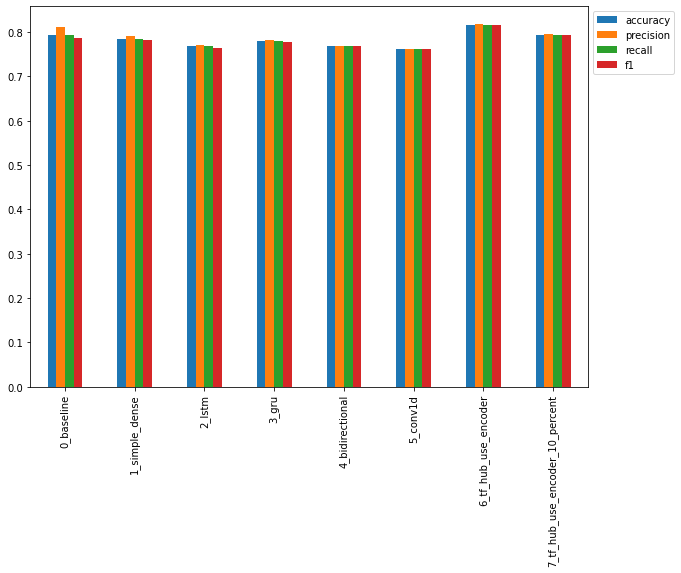

In [117]:
#Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

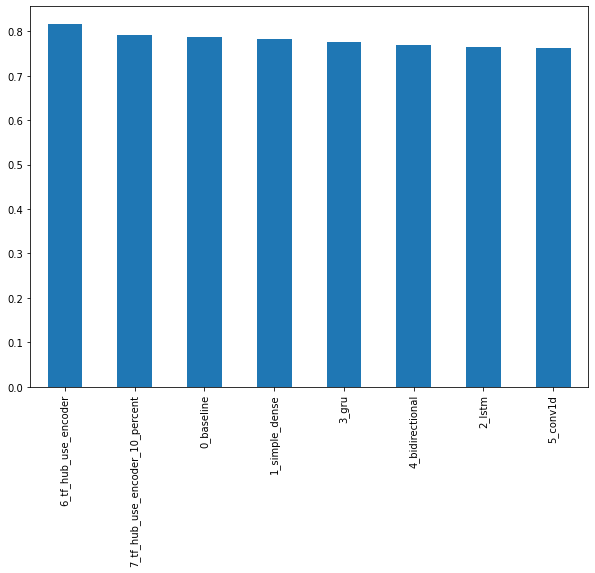

In [120]:
# Sort model results by f1 score
all_model_results.sort_values("f1",ascending = False)["f1"].plot(kind="bar",figsize=(10,7))

## Uploading model training logs to Tensorboard.dev

In [122]:
#View Tensorboard logs of transfer learning model experiments (plus all other experiments)
#Upload TensorBoard Dev records
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modelling Experiments ZTM TF Course" \
  --description "Comparing multiple different types of model architectures on the Kaggle tweet text classification dataset" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=yMQVvTXT54itK00pqOb7l44dkNHAGt&prompt=consent&access_type=offline

In [123]:
#see previous tensorboard dev experiment run
!tensorboard dev list

https://tensorboard.dev/experiment/L8zkTpwVRoyVYjdcj1WPfQ/
	Name                 NLP Modelling Experiments ZTM TF Course
	Description          Comparing multiple different types of model architectures on the Kaggle tweet text classification dataset
	Id                   L8zkTpwVRoyVYjdcj1WPfQ
	Created              2023-01-24 03:32:27 (2 minutes ago)
	Updated              2023-01-24 03:32:37 (1 minute ago)
	Runs                 18
	Tags                 5
	Scalars              270
	Tensor bytes         0
	Binary object bytes  4745535
https://tensorboard.dev/experiment/b6OxvCD1Q6uojloWIB1qyA/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning
	Id                   b6OxvCD1Q6uojloWIB1qyA
	Created              2023-01-15 00:50:14
	Updated              2023-01-15 00:50:25
	Runs                 10
	Tags                 7
	Scalars              162
	Ten

In [ ]:
## to delete an experiment from tensorboard
#tensorboard dev delete --experiment_id <exp id>

## Saving and loading a trained model


Two formats used:
1. HDF5 format
2. savedmodel format

In [125]:
# save tf hub sentence encoder model to HDF5 model
model_6.save("model_6.h5")

In [126]:
import tensorflow_hub as hub

In [127]:
#Load back the model with custom Hub layer(required HDF5)
loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                            custom_objects={"KerasLayer": hub.KerasLayer})


In [128]:
# evaluate the loaded model
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 20ms/step - loss: 0.4291 - accuracy: 0.8163


[0.4291234016418457, 0.8162729740142822]

In [129]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8170007401548035,
 'recall': 0.8162729658792651,
 'f1': 0.8153469807013113}

Lets save to "SavedModel" format

In [130]:
#Save TF hub sentence encoder model to SavedModel format
model_6.save("model_6_SavedModel_format")

In [131]:
#Load in model from savedmodel format
loaded_model_6_savedmodel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [132]:
#Evaluate loaded model
loaded_model_6_savedmodel_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4291 - accuracy: 0.8163


[0.4291234016418457, 0.8162729740142822]

## Finding the most wrong examples

1. If our best model still isn't perfect, what examples is it getting wrong?
2. Which ones are the most wrong?
Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect this


In [134]:
#download a pretrained model from google drive
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

!unzip 08_model_6_USE_feature_extractor.zip

--2023-01-24 03:49:36--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.251.18.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  34.4MB/s    in 26s     

2023-01-24 03:50:03 (34.7 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variable

In [137]:
#Import previously trained model from google storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [138]:
#Make predictions
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 1s 18ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [139]:
#Create DataFrame with validation sentences,validation labels and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [143]:
# find the wrong prediction and sort by pred probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [144]:
# Check the false positive(model predicted 1 when should have been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f" Target:{target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text: \n{text}\n")
  print("----\n")

 Target:0, Pred: 1.0, Prob: 0.9101957678794861
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

 Target:0, Pred: 1.0, Prob: 0.8769821524620056
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

 Target:0, Pred: 1.0, Prob: 0.8523000478744507
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

 Target:0, Pred: 1.0, Prob: 0.8354544639587402
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

 Target:0, Pred: 1.0, Prob: 0.8272132277488708
Text: 
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

 Target:0, Pred: 1.0, Prob: 0.814815878868103
Text: 
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

In [146]:
# Check the false negatives(model predicted 0 when should have been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f" Target:{target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text: \n{text}\n")
  print("----\n")

 Target:1, Pred: 0.0, Prob: 0.06730346381664276
Text: 
@DavidVonderhaar At least you were sincere ??

----

 Target:1, Pred: 0.0, Prob: 0.05507579818367958
Text: 
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

 Target:1, Pred: 0.0, Prob: 0.05460336431860924
Text: 
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

 Target:1, Pred: 0.0, Prob: 0.05459698289632797
Text: 
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

 Target:1, Pred: 0.0, Prob: 0.04963728412985802
Text: 
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

 Target:1, Pred: 0.0, Prob: 0.043918490409851074
Text: 
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

 Target:1, Pred: 0.0, Pro

## Making predictions on the test dataset

In [148]:
#Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text: \n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 62ms/step
Pred: 1, Prob: 0.8902705311775208
Text: 
@FarhanKVirk @PTISalarKhan ! Instead of promoting false news first get your facts right . It was a road rage incident . Vehicles collided

----

1/1 [==============================] - 0s 59ms/step
Pred: 0, Prob: 0.09456688165664673
Text: 
Took the time to finally install #win10 on one of my systems. Let's see if it will survive a weekend of #lanparty.

----

1/1 [==============================] - 0s 61ms/step
Pred: 0, Prob: 0.33107465505599976
Text: 
Ignition Knock (Detonation) Sensor-Senso Standard KS225 http://t.co/IwrCPmjOah http://t.co/zZMM9xEccW

----

1/1 [==============================] - 0s 69ms/step
Pred: 1, Prob: 0.8268129825592041
Text: 
Refugio oil spill may have been costlier bigger than projected - http://t.co/6aUOT9vaIS  http://t.co/j2SyewbHE2

----

1/1 [==============================] - 0s 58ms/step
Pred: 0, Prob: 0.2746492326259613
Text: 
@YoungHeroesID 
4. LAVA BLAST dan POWE

## The speed/score tradeoff

In [150]:
#Lets make a function to measure the time of prediction
import time
def pred_timer(model,samples):
  start_time = time.perf_counter()#get strat time
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time-start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [152]:
#Calculate TF Hub sentence encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained,
                                                            samples = val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 15ms/step


(0.7207873469997139, 0.0009459151535429317)

In [154]:
#calculate baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0,
                                                            samples = val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.023967070000253443, 3.1452847769361476e-05)

In [155]:
model_6_pretrained_results = calculate_results(val_labels,
                                               model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

Text(0, 0.5, 'F1-score')

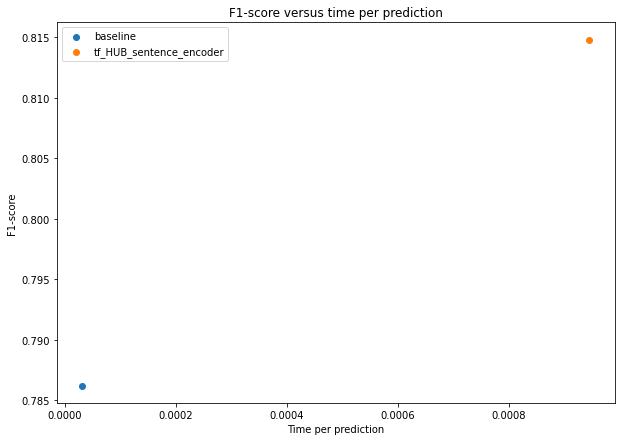

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"],label ="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"],label="tf_HUB_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score")